# Prerequisits

**Importing necessary packages.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
# from dateutil.parser import parse
import matplotlib.pyplot as plt

**Implementing Currency Converting Tools.**

In [ ]:
'''Currency Converting Tools Cell.'''

LAST_UPDATE = None


class CurrencyConverter:   
    def __init__(self,src,dst):
        self.src = src
        self.dst = dst

    def Convert(self):
        global LAST_UPDATE
        url = f"https://open.er-api.com/v6/latest/{self.src}"

        # request the open ExchangeRate API and convert to Python dict using .json()
        data = requests.get(url).json()

        if data["result"] == "success":
            # request successful
            # # get the last updated datetime
            last_updated_datetime = data["time_last_update_utc"]
            # get the exchange rates
            exchange_rate = data["rates"][self.dst]
            LAST_UPDATE = last_updated_datetime
            
            return last_updated_datetime, exchange_rate
        else:
            raise FileNotFoundError("REQUEST DIDN'T SUCCEED")


cur_dict = {
    '֏' : ['AMD', CurrencyConverter("AMD", "USD").Convert()[1]],
    '$' : ['USD', 1.0],
    '€' : ['EUR', CurrencyConverter("EUR", "USD").Convert()[1]]
}


def Convert(amount):
    amount = amount.replace(' ','').replace(',','')
    
    if amount[0] in cur_dict:
        exchange = cur_dict[amount[0]][1]
        amount = amount[1:]
    else:
        exchange = cur_dict[amount[-1]][1]
        amount = amount[:-1]

    amount_usd = float(amount) * exchange

    return amount_usd

# **Analyzing Yerevan Apartment Posts In List.am**

**This is our project, in which we are going to analyze Yerevan Apartment Posts. We have scraped a dataset of about 2000 apartments from List.am on which we can apply data manipulations with Pandas. Our main goal is to determine average prices of apartments depending various features they have.**

## The Dataset

In [ ]:
# get the URL containing the dataset
url = 'https://drive.google.com/file/d/14-dyoy1EqMTKp_m9LXkZmvQF1GJKESTO/view?usp=sharing'
# extract the ID
file_id = url.split('/')[-2]
# read the dataset by the link
df = pd.read_csv(f'https://drive.google.com/uc?export=download&id={file_id}')

**The dataset consists of apartment records each has 14 features to work with:**

* `link` - the post link
* `price` - the price of the apartment
* `district` - the district of Yerevan in which the apartment is located
* `area` - the area of the apartment
* `rooms` - the number of rooms in the apartment
* `building_floors` - the number of floors in the building
* `floor` - the floor of the apartment
* `elevator` - elevator availability
* `bathrooms` - the number of bathrooms in the apartment
* `ceiling_height` - the height of the apartment ceiling
* `balcony` - balcony availability
* `building_type` - the type of the building
* `new_construction` - whether the building is new
* `renovation` - the type of the renovation of the apartment

In [ ]:
df

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,"$100,000",Քանաքեռ Զեյթուն,80 ք.մ.,3,NaN,4 / 5,Առկա չէ,1,"2,8 մ",Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,"$68,000",Շենգավիթ,76 ք.մ.,3,NaN,5 / 5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,"$110,000",Կենտրոն,36 ք.մ.,1,NaN,5 / 5,Առկա չէ,1,"2,75 մ",Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,"35,000,000 ֏",Մալաթիա Սեբաստիա,69 ք.մ.,3,NaN,6 / 9,Առկա է,1,"2,8 մ",Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,"$85,000",Քանաքեռ Զեյթուն,73 ք.մ.,3,NaN,3 / 5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,https://www.list.am/item/9901126,"$82,000",Կենտրոն,77 ք.մ.,3,NaN,1 / 2,Առկա չէ,1,3 մ,Առկա չէ,Քարե,Ոչ,Կապիտալ վերանորոգված
1703,https://www.list.am/item/17138511,"$55,000",Շենգավիթ,58 ք.մ.,3,NaN,5 / 5,Առկա չէ,1,"2,75 մ",Մի քանի պատշգամբ,Քարե,Ոչ,Մասնակի վերանորոգում
1704,https://www.list.am/item/17951535,"$74,000",Ավան,60 ք.մ.,3,NaN,11 / 14,Առկա է,1,"2,8 մ",Առկա չէ,Պանելային,Ոչ,Կապիտալ վերանորոգված
1705,https://www.list.am/item/17220001,"$97,000",Շենգավիթ,82 ք.մ.,3,NaN,4 / 5,Առկա չէ,2,3 մ,Բաց պատշգամբ,Քարե,Ոչ,Եվրովերանորոգված


In [ ]:
df.to_csv('data_frame_before.csv', encoding='utf-8', index=False)

#### Apartment distribution over every `district` in the dataset.

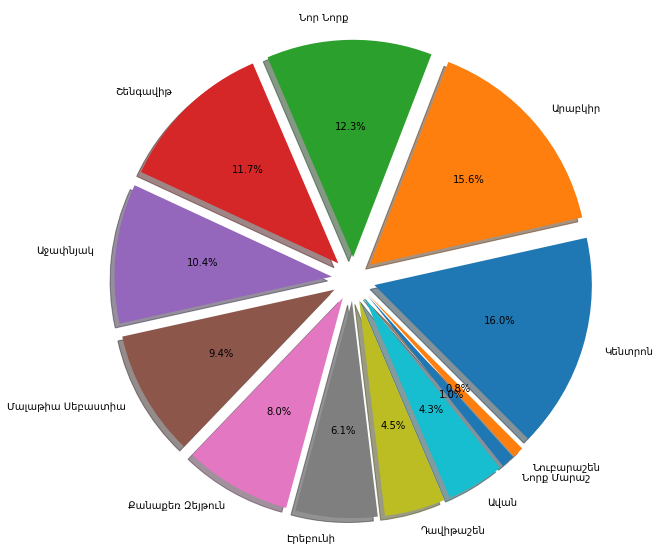

In [ ]:
df_dis = df['district']
df_dis.reset_index(drop=True)
districts = np.array(df_dis.value_counts().index)
homes = df_dis.value_counts().values
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.pie(homes, explode=explode, labels=districts, autopct='%1.1f%%',
        shadow=True, startangle=-45)
plt.show()

## Data Preprocessing and Cleaning

**Data Preprocessing Steps**

* `price` type convert to float and convert all currencies to USD
* `area` type convert to int 
* `room` type convert to int
* `bathrooms` type convert to int 
* `ceiling_height` type convert to float
* `elevator` consistent values: 1, 0
* `new_construction` consistent values: 1, 0
* move `floor` column right values to `building_floors` column
* `floor` type convert to int
* `building_floors`  type convert to int

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,"$100,000",Քանաքեռ Զեյթուն,80 ք.մ.,3,NaN,4 / 5,Առկա չէ,1,"2,8 մ",Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,"$68,000",Շենգավիթ,76 ք.մ.,3,NaN,5 / 5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,"$110,000",Կենտրոն,36 ք.մ.,1,NaN,5 / 5,Առկա չէ,1,"2,75 մ",Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,"35,000,000 ֏",Մալաթիա Սեբաստիա,69 ք.մ.,3,NaN,6 / 9,Առկա է,1,"2,8 մ",Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,"$85,000",Քանաքեռ Զեյթուն,73 ք.մ.,3,NaN,3 / 5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,https://www.list.am/item/9901126,"$82,000",Կենտրոն,77 ք.մ.,3,NaN,1 / 2,Առկա չէ,1,3 մ,Առկա չէ,Քարե,Ոչ,Կապիտալ վերանորոգված
1703,https://www.list.am/item/17138511,"$55,000",Շենգավիթ,58 ք.մ.,3,NaN,5 / 5,Առկա չէ,1,"2,75 մ",Մի քանի պատշգամբ,Քարե,Ոչ,Մասնակի վերանորոգում
1704,https://www.list.am/item/17951535,"$74,000",Ավան,60 ք.մ.,3,NaN,11 / 14,Առկա է,1,"2,8 մ",Առկա չէ,Պանելային,Ոչ,Կապիտալ վերանորոգված
1705,https://www.list.am/item/17220001,"$97,000",Շենգավիթ,82 ք.մ.,3,NaN,4 / 5,Առկա չէ,2,3 մ,Բաց պատշգամբ,Քարե,Ոչ,Եվրովերանորոգված


#### move `floor` column right values to `building_floors` column

In [ ]:
# droping all the records with NaN value in the 'floors' column  
df = df[df['floor'].notna()]

In [ ]:
# extracting right values from 'floors' column
# and assinging them to the 'building_floors' column
right_values = [int(row[1]) for row in df['floor'].str.split(' / ')]
df['building_floors'] = right_values

In [ ]:
# droping right values from 'floors' column
left_values = [int(row[0]) for row in df['floor'].str.split(' / ')]
df['floor'] = left_values

In [ ]:
df.head()

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,"$100,000",Քանաքեռ Զեյթուն,80 ք.մ.,3,5,4,Առկա չէ,1,"2,8 մ",Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,"$68,000",Շենգավիթ,76 ք.մ.,3,5,5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,"$110,000",Կենտրոն,36 ք.մ.,1,5,5,Առկա չէ,1,"2,75 մ",Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,"35,000,000 ֏",Մալաթիա Սեբաստիա,69 ք.մ.,3,9,6,Առկա է,1,"2,8 մ",Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,"$85,000",Քանաքեռ Զեյթուն,73 ք.մ.,3,5,3,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված


`floor` and `building_floors` type conversions to `int` were done during the step below.

#### `price` type convert to float and convert all currencies to **USD** 

In [ ]:
# drop the rows containing NaN value
df = df.dropna()

In [ ]:
# drop the rows which price value contains '.' --> 'руб.'
df = df.drop(df[df['price'].str.contains('.', regex=False)].index)

In [ ]:
# convert price currency to USD
df['price'] = df['price'].apply(Convert)

In [ ]:
df.head()

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,100000.0,Քանաքեռ Զեյթուն,80 ք.մ.,3,5,4,Առկա չէ,1,"2,8 մ",Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,68000.0,Շենգավիթ,76 ք.մ.,3,5,5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,110000.0,Կենտրոն,36 ք.մ.,1,5,5,Առկա չէ,1,"2,75 մ",Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,86170.0,Մալաթիա Սեբաստիա,69 ք.մ.,3,9,6,Առկա է,1,"2,8 մ",Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,85000.0,Քանաքեռ Զեյթուն,73 ք.մ.,3,5,3,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված


#### `area` type convert to int 

In [ ]:
# deleting tailing 'ք.մ.' substring
# and converting area type to int
areas = [int(area[:-4]) for area in df['area']]
df['area'] = areas

In [ ]:
df.head()

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,100000.0,Քանաքեռ Զեյթուն,80,3,5,4,Առկա չէ,1,"2,8 մ",Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,68000.0,Շենգավիթ,76,3,5,5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,110000.0,Կենտրոն,36,1,5,5,Առկա չէ,1,"2,75 մ",Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,86170.0,Մալաթիա Սեբաստիա,69,3,9,6,Առկա է,1,"2,8 մ",Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,85000.0,Քանաքեռ Զեյթուն,73,3,5,3,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված


#### `room` type convert to int

In [ ]:
df['rooms'].value_counts()

3     765
2     369
4     312
1     181
5      45
6      21
8+      4
7       3
Name: rooms, dtype: int64

In [ ]:
# droping rows with 'rooms' value: '8+'
df = df.drop(df[df['rooms'].str.len() >= 2].index)

In [ ]:
df['rooms'] = df['rooms'].astype('int')

In [ ]:
df.head()

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,100000.0,Քանաքեռ Զեյթուն,80,3,5,4,Առկա չէ,1,"2,8 մ",Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,68000.0,Շենգավիթ,76,3,5,5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,110000.0,Կենտրոն,36,1,5,5,Առկա չէ,1,"2,75 մ",Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,86170.0,Մալաթիա Սեբաստիա,69,3,9,6,Առկա է,1,"2,8 մ",Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,85000.0,Քանաքեռ Զեյթուն,73,3,5,3,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված


#### `bathrooms` type convert to int

In [ ]:
# there are '3+' values for 'bathrooms' column
# converting '3+' to '3'
mask = df['bathrooms'].str.len() >= 2
df.loc[mask, 'bathrooms'] = '3'

In [ ]:
df['bathrooms'] = df['bathrooms'].astype('int')

In [ ]:
df.head()

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,100000.0,Քանաքեռ Զեյթուն,80,3,5,4,Առկա չէ,1,"2,8 մ",Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,68000.0,Շենգավիթ,76,3,5,5,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,110000.0,Կենտրոն,36,1,5,5,Առկա չէ,1,"2,75 մ",Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,86170.0,Մալաթիա Սեբաստիա,69,3,9,6,Առկա է,1,"2,8 մ",Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,85000.0,Քանաքեռ Զեյթուն,73,3,5,3,Առկա չէ,1,"2,7 մ",Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված


#### `ceiling_height` type convert to float

In [ ]:
df['ceiling_height'].value_counts()

3 մ       414
2,8 մ     398
2,75 մ    367
2,7 մ     287
2,5 մ      71
3,5 մ      68
2,6 մ      46
3,2 մ      45
Name: ceiling_height, dtype: int64

In [ ]:
# extracting heights from 'heights' column
# droping tailing 'մ.' substring and
# replacing ',' by '.' for float conversion
heights = [float(height[:-1].replace(',', '.')) for height in df['ceiling_height']]
df['ceiling_height'] = heights

In [ ]:
df.head()

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,100000.0,Քանաքեռ Զեյթուն,80,3,5,4,Առկա չէ,1,2.80,Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,68000.0,Շենգավիթ,76,3,5,5,Առկա չէ,1,2.70,Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,110000.0,Կենտրոն,36,1,5,5,Առկա չէ,1,2.75,Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,86170.0,Մալաթիա Սեբաստիա,69,3,9,6,Առկա է,1,2.80,Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,85000.0,Քանաքեռ Զեյթուն,73,3,5,3,Առկա չէ,1,2.70,Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված


#### `elevator` consistent values: 1, 0

In [ ]:
df['elevator'].value_counts()

Առկա է     961
Առկա չէ    735
Name: elevator, dtype: int64

In [ ]:
# creating mapping for 'elevator' column
# to map to the consistent values
elevator_mapping = {'Առկա է':1, 'Առկա չէ':0}
df['elevator'] = df['elevator'].map(elevator_mapping)

In [ ]:
df.head()

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,100000.0,Քանաքեռ Զեյթուն,80,3,5,4,0,1,2.80,Առկա չէ,Քարե,Ոչ,Հին վերանորոգում
1,https://www.list.am/item/17300857,68000.0,Շենգավիթ,76,3,5,5,0,1,2.70,Բաց պատշգամբ,Քարե,Ոչ,Հին վերանորոգում
2,https://www.list.am/item/16663483,110000.0,Կենտրոն,36,1,5,5,0,1,2.75,Փակ պատշգամբ,Քարե,Ոչ,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,86170.0,Մալաթիա Սեբաստիա,69,3,9,6,1,1,2.80,Փակ պատշգամբ,Պանելային,Ոչ,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,85000.0,Քանաքեռ Զեյթուն,73,3,5,3,0,1,2.70,Բաց պատշգամբ,Պանելային,Ոչ,Կապիտալ վերանորոգված


#### `new_construction` consistent values: 1, 0

In [ ]:
df['new_construction'].value_counts()

Ոչ     1424
Այո     272
Name: new_construction, dtype: int64

In [ ]:
# creating mapping for 'new_construction' column 
# to map to the consistent values
new_construction_mapping = {'Այո':1, 'Ոչ':0}
df['new_construction'] = df['new_construction'].map(new_construction_mapping)

In [ ]:
df.head()

,link,price,district,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,balcony,building_type,new_construction,renovation
0,https://www.list.am/item/16874143,100000.0,Քանաքեռ Զեյթուն,80,3,5,4,0,1,2.80,Առկա չէ,Քարե,0,Հին վերանորոգում
1,https://www.list.am/item/17300857,68000.0,Շենգավիթ,76,3,5,5,0,1,2.70,Բաց պատշգամբ,Քարե,0,Հին վերանորոգում
2,https://www.list.am/item/16663483,110000.0,Կենտրոն,36,1,5,5,0,1,2.75,Փակ պատշգամբ,Քարե,0,Կապիտալ վերանորոգված
3,https://www.list.am/item/17599233,86170.0,Մալաթիա Սեբաստիա,69,3,9,6,1,1,2.80,Փակ պատշգամբ,Պանելային,0,Կոսմետիկ վերանորոգում
4,https://www.list.am/item/17899722,85000.0,Քանաքեռ Զեյթուն,73,3,5,3,0,1,2.70,Բաց պատշգամբ,Պանելային,0,Կապիտալ վերանորոգված


#### The Dataset Summary Statistics

In [ ]:
df.describe()

,price,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,new_construction
count,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000
mean,98188.926956,86.239387,2.850236,7.933962,4.712264,0.566627,1.201061,2.841775,0.160377
std,72769.090873,129.372200,1.025906,3.968505,3.380282,0.495687,0.437503,0.197533,0.367064
min,2.708200,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.500000,0.000000
25%,60000.000000,60.000000,2.000000,5.000000,2.000000,0.000000,1.000000,2.750000,0.000000
50%,80000.000000,78.000000,3.000000,9.000000,4.000000,1.000000,1.000000,2.800000,0.000000
75%,115000.000000,96.000000,3.000000,9.000000,7.000000,1.000000,1.000000,3.000000,0.000000
max,750000.000000,4677.000000,7.000000,19.000000,18.000000,1.000000,3.000000,3.500000,1.000000


## Analysis Problems

**Problem List**

* mean price of apartments per square meter by `district`
* mean price of apartments per square meter by
`renovation`
* mean price of apartments per square meter by
`bulding_type`
* mean price of apartments by
`elevator` availability in every `district`
* the most expensive apartments in every `district`
* mean price of apartments by
`balcony` availability in every `district`


#### mean price of apartments per square meter by `district`

In [ ]:
# adding a column presenting
# the price per square meter of the apartment
df['price_per_sm'] = df['price'] / df['area']

In [ ]:
ddf = df.groupby('district')[['price_per_sm']].mean()
ddf = ddf.sort_values('price_per_sm', ascending=False)
ddf

,price_per_sm
district,
Կենտրոն,2079.531542
Արաբկիր,1377.552705
Նորք Մարաշ,1336.307990
Դավիթաշեն,1173.500631
Քանաքեռ Զեյթուն,1100.590653
Աջափնյակ,1029.892928
Էրեբունի,983.517619
Նոր Նորք,974.378493
Ավան,967.770940


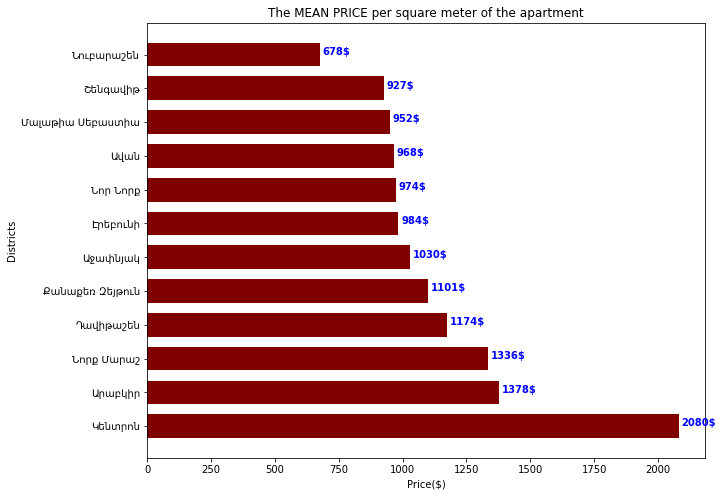

In [ ]:
district = ddf.index
price = ddf['price_per_sm'].round()
fig, ax = plt.subplots(figsize=(10, 8))
plt.barh(district, price, color='maroon', height=0.7)
plt.title('The MEAN PRICE per square meter of the apartment')
plt.xlabel('Price($)')
plt.ylabel('Districts')
for i, v in enumerate(price):
    ax.text(v + 10, i, str(v)[:-2] + '$', color='blue', fontweight='bold')

#### mean price of apartments per square meter by `renovation`

In [ ]:
ddf = df.groupby('renovation')[['price_per_sm']].mean()
ddf = ddf.sort_values('price_per_sm', ascending=False)
ddf

,price_per_sm
renovation,
Դիզայներական ոճով վերանորոգված,1770.798124
Կապիտալ վերանորոգված,1408.096982
Եվրովերանորոգված,1222.284785
Չվերանորոգված,1165.599797
Մասնակի վերանորոգում,1103.937198
Կոսմետիկ վերանորոգում,1082.286562
Հին վերանորոգում,1047.662304


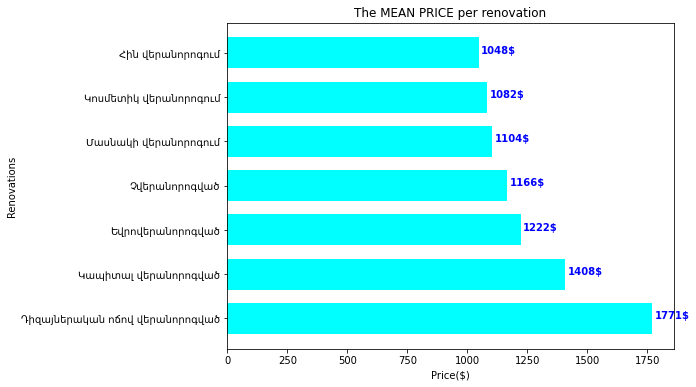

In [ ]:
renovation = ddf.index
price = ddf['price_per_sm'].round()
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(renovation, price, color='aqua', height=0.7)
ax.set_title('The MEAN PRICE per renovation')
ax.set_xlabel('Price($)')
ax.set_ylabel('Renovations')
for i, v in enumerate(price):
    ax.text(v + 10, i, str(v)[:-2] + '$', color='blue', fontweight='bold')

#### mean price of apartments per square meter by `bulding_type`

In [ ]:
dff = df.groupby('building_type')[['price_per_sm']].mean()
dff = dff.sort_values('price_per_sm')
dff

,price_per_sm
building_type,
Կասետային,1009.013086
Պանելային,1090.547940
Աղյուսե,1110.286663
Քարե,1184.914093
Փայտե,1500.000000
Մոնոլիտ,1723.540914


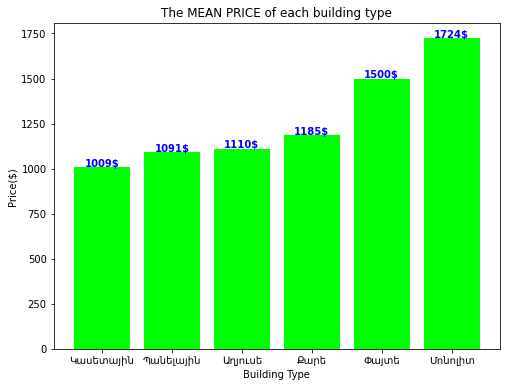

In [ ]:
building = dff.index
price = dff['price_per_sm'].round()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(building, price, color='lime')
ax.set_title('The MEAN PRICE of each building type')
ax.set_xlabel('Building Type')
ax.set_ylabel('Price($)')
for i, v in enumerate(price):
    ax.text(i - 0.25, v + 5, str(v)[:-2] + '$', color='blue', fontweight='bold')


#### mean price of apartments by `elevator` availability in every district

In [ ]:
df.groupby('elevator')[['price_per_sm']].mean()

,price_per_sm
elevator,
0,1179.751654
1,1269.836614


In [ ]:
ddff = df.groupby(['district','elevator'])[['price_per_sm']].mean().unstack()
ddff

price_per_sm             
elevator                    0            1
district                                  
Աջափնյակ          1059.068870  1008.440029
Ավան               794.692234  1005.271326
Արաբկիր           1328.661988  1426.443421
Դավիթաշեն         1012.539345  1189.596759
Էրեբունի           944.821696  1036.284786
Կենտրոն           2052.642138  2096.747319
Մալաթիա Սեբաստիա   893.108755   965.577492
Նոր Նորք           990.999951   961.560249
Նորք Մարաշ         925.741777  1695.553427
Նուբարաշեն         668.289392   800.000000
Շենգավիթ           909.660586   964.190226
Քանաքեռ Զեյթուն   1009.289506  1191.891801

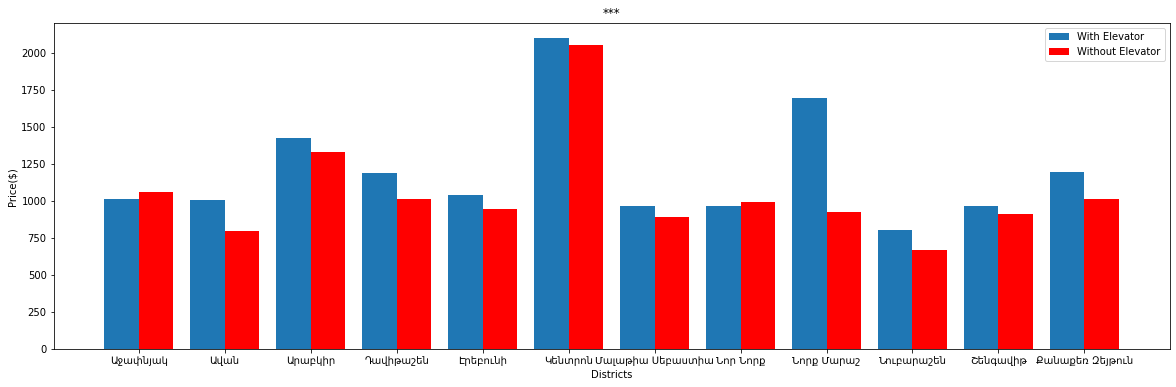

In [ ]:
district = ddff.index
not_elevator = ddff['price_per_sm'][0].values.round()
elevator = ddff['price_per_sm'][1].values.round()
fig, ax = plt.subplots(figsize=(20, 6))
x = np.arange(len(district)) 
width = 0.4
plt.bar(x - width/2, elevator, width, label='With Elevator')
plt.bar(x + width/2, not_elevator, width, label='Without Elevator', color='r')
plt.ylabel('Price($)')
plt.xlabel('Districts')
plt.title('***')
plt.xticks(x, district)
ax.legend()
fig.savefig('foo4.png')
plt.show()


#### the most expensive apartments in every `district`

In [ ]:
df.groupby('district')[['price', 'link']].max()

,price,link
district,,
Աջափնյակ,255000.0,https://www.list.am/item/18085867
Ավան,200000.0,https://www.list.am/item/18058077
Արաբկիր,650000.0,https://www.list.am/item/18085984
Դավիթաշեն,245000.0,https://www.list.am/item/18085942
Էրեբունի,200000.0,https://www.list.am/item/18068297
Կենտրոն,750000.0,https://www.list.am/item/9901126
Մալաթիա Սեբաստիա,580000.0,https://www.list.am/item/9425486
Նոր Նորք,390000.0,https://www.list.am/item/18085969
Նորք Մարաշ,285000.0,https://www.list.am/item/18024245


#### mean price of apartments by `balcony` availability in every `district`

In [ ]:
df_balcony = df.groupby(['district', 'balcony'])[['price']].mean().unstack()
df_balcony

price                                               
balcony                 Առկա չէ   Բաց պատշգամբ Մի քանի պատշգամբ   Փակ պատշգամբ
district                                                                      
Աջափնյակ           69526.854167   79599.080000     90759.823077   75001.743396
Ավան               62810.918182   81004.299455    131117.000000   68681.233333
Արաբկիր            91476.176638  125620.329545    169680.163636   99895.405217
Դավիթաշեն          78518.909091  101037.187667    120757.333333   82952.266667
Էրեբունի           55842.670000   88539.285714     70674.562500   71023.437500
Կենտրոն           150247.319565  196664.111111    222008.636364  130142.945833
Մալաթիա Սեբաստիա   64694.923077   78054.762162     98062.500000   69424.731644
Նոր Նորք           59314.584709   88947.000000     81999.222222   64380.593118
Նորք Մարաշ         85600.000000  100000.000000    126475.000000            NaN
Նուբարաշեն         35500.000000   46200.000000     55478.666667   39250.000000
Շենգավիթ           53328.503284   69967.955893     83810.090909   60289.661962
Քանաքեռ Զեյթուն    77829.134909  110170.628000     99034.482759   71389.589744

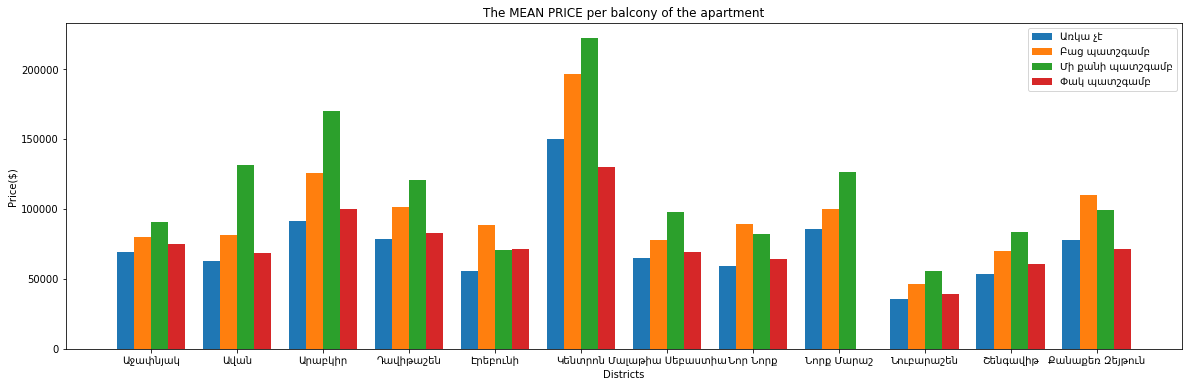

In [ ]:
district = df_balcony.index
not_balcony = df_balcony['price']['Առկա չէ'].values
open_balcony = df_balcony['price']['Բաց պատշգամբ'].values
many_balcony = df_balcony['price']['Մի քանի պատշգամբ'].values
closed_balcony = df_balcony['price']['Փակ պատշգամբ'].values

x = np.arange(len(district))
width = 0.2
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(x - 3/2*width, not_balcony, width, label='Առկա չէ')
ax.bar(x - width / 2, open_balcony, width, label='Բաց պատշգամբ')
ax.bar(x + width / 2, many_balcony, width, label='Մի քանի պատշգամբ')
ax.bar(x + 3/2*width, closed_balcony, width, label='Փակ պատշգամբ')
ax.set_title('The MEAN PRICE per balcony of the apartment')
ax.set_xlabel('Districts')
ax.set_ylabel('Price($)')
plt.xticks(x, np.array(district))
ax.legend()
plt.savefig('foo5.png')
plt.show()

In [ ]:
df.corr()

,price,area,rooms,building_floors,floor,elevator,bathrooms,ceiling_height,new_construction,price_per_sm
price,1.000000,0.154439,0.416819,0.108455,0.098191,0.092922,0.448540,0.306401,0.359946,0.591603
area,0.154439,1.000000,0.204758,-0.053286,-0.020544,-0.032347,0.135727,0.053408,0.033344,-0.082478
rooms,0.416819,0.204758,1.000000,0.045679,0.050173,0.033555,0.340532,0.089990,0.062253,-0.071548
building_floors,0.108455,-0.053286,0.045679,1.000000,0.618518,0.782613,0.092262,-0.065718,0.265264,0.073158
floor,0.098191,-0.020544,0.050173,0.618518,1.000000,0.481506,0.087413,-0.057488,0.155609,0.056864
elevator,0.092922,-0.032347,0.033555,0.782613,0.481506,1.000000,0.078295,-0.038535,0.226578,0.059867
bathrooms,0.448540,0.135727,0.340532,0.092262,0.087413,0.078295,1.000000,0.153633,0.273000,0.108456
ceiling_height,0.306401,0.053408,0.089990,-0.065718,-0.057488,-0.038535,0.153633,1.000000,0.311125,0.185445
new_construction,0.359946,0.033344,0.062253,0.265264,0.155609,0.226578,0.273000,0.311125,1.000000,0.271360
price_per_sm,0.591603,-0.082478,-0.071548,0.073158,0.056864,0.059867,0.108456,0.185445,0.271360,1.000000


### Correlation Matrices

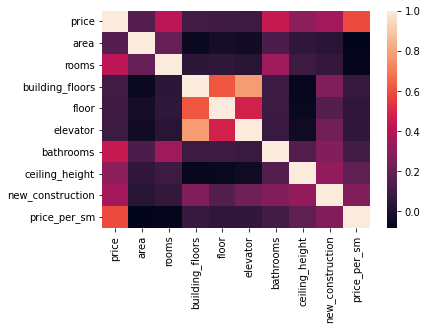

In [ ]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


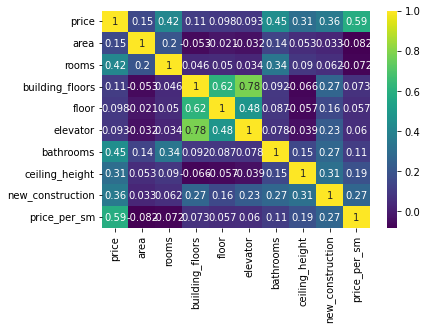

In [ ]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "viridis", annot=True)


In [ ]:
center = df[df['district'] == 'Կենտրոն']
center.to_csv('center.csv', index=False)